In [83]:
from aqua import catalogue, inspect_catalogue

cat = catalogue()
inspect_catalogue(cat, model = 'CERES', exp = 'syn-toa41')

reader = Reader(model = 'CERES', exp = 'syn-toa41',source="daily") 
data = reader.retrieve()
data.isel(time=1).toa_sw_all_daily.load()

Sources available in catalogue for model CERES and exp syn-toa41:


<xarray.DataArray 'toa_sw_all_daily' (lat: 180, lon: 360)>
array([[369.1749 , 369.1749 , 369.1749 , ..., 369.1749 , 369.1749 ,
        369.1749 ],
       [370.47293, 370.47293, 370.47293, ..., 370.47293, 370.47293,
        370.47293],
       [377.96204, 377.96204, 377.96204, ..., 377.96204, 377.96204,
        377.96204],
       ...,
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2001-01-02T12:00:00
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    long_name:      Observed Top of the Atmosphere Shortwave Flux, All-sky co...
    standard_name:  Observed TOA Shortwave Flux - All-sky
    units:          W m-2
    valid_min:             0
    valid_max:          1400

In [57]:
# Modules will import some dependencies like Onepass
from modules import *

# AQUA reader. One note: regrider is not working for 3d variables
reader = Reader(model = 'FESOM', exp = 'tco3999-ng5', source="interpolated_global_TS") 
data = reader.retrieve()

# # Dropping the variables, which are not required
# data=data.drop("latitude")
# data=data.drop("longitude")
# data=data.drop("ocpt")
# data=data.coarsen(lat=30, lon=40).mean()  #Here will not use AQUA regridder, because it's just fake thing

# # Renaming the Variables
# data=data.rename({"salt":"so"})
# data=data.rename({"temp":"thetao"})
# data=data.rename({"depth":"lev"})

# # Faking some changes in date for our next codes
# data = data.resample(time='7.39H').mean() 
# time = np.arange('2011-01-01', '2013-01-01', dtype='datetime64[D]')
# data["time"]=time

ds2=data

(array([7.32940000e+04, 5.90070000e+04, 3.61900000e+03, 7.71030000e+04,
        1.26048000e+05, 5.51430000e+04, 2.91384000e+05, 3.50969790e+07,
        1.55854568e+08, 2.52859600e+06]),
 array([ 3.57289028,  7.31397915, 11.05506802, 14.79615688, 18.5372467 ,
        22.27833557, 26.01942444, 29.76051331, 33.50160217, 37.24269104,
        40.98377991]),
 <BarContainer object of 10 artists>)

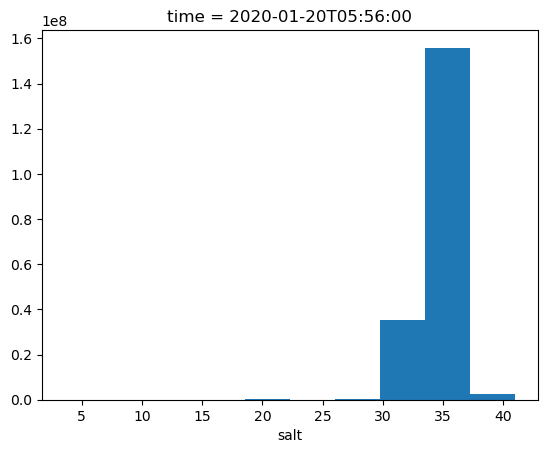

In [59]:
data.isel(time=1).salt.plot()

In [51]:
#ds2.lat*2*math.pi/360
weights=np.cos(np.deg2rad(ds2.lat)) # Weights are proportional to the grid cell area, which is influenced by the latd

In [52]:
t3d=ds2.thetao.resample(time="Y").mean()
t3dw=t3d.weighted(weights)
#LatIndexer, LonIndexer = 'lat', 'lon'
#SliceData = data.sel(**{LatIndexer: slice(max_lat, min_lat),
#                        LonIndexer: slice(max_lon, min_lon)})
#t3d.isel(lat=slice(30,60), lon=slice(0,180))
# ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))
#t3d

In [53]:
#tt=masked_average(ds2['thetao'], dim=['i','j'], weights=acello)
tg=t3d.mean(("lat","lon"))
tgw=t3dw.mean(("lat","lon"))
# To double check that weighted and unweighted averages are different
#tg[:,0].plot.line()
#tgw[:,0].plot.line()

In [54]:
# We identify the levels that represent each selected ocean detph
levs=t3d.lev
ilev0=0

for ilev in range(len(levs)):
 tlev = levs[ilev]
 #print(tlev.values)
# if tlev <= 1000: print(ilev)
# if tlev<= 500: print(ilev)
 if tlev<= 500: ilev500=ilev
 if tlev<= 1000: ilev1000=ilev
 if tlev<= 2000: ilev2000=ilev
 if tlev<= 3000: ilev3000=ilev
 if tlev<= 4000: ilev4000=ilev
 if tlev<= 5000: ilev5000=ilev
print(ilev0,ilev500,ilev1000,ilev2000,ilev3000,ilev4000,ilev5000)

0 20 20 20 20 20 20


In [56]:
tgst.

<xarray.DataArray 'thetao' (lev: 21, time: 2)>
dask.array<transpose, shape=(21, 2), dtype=float32, chunksize=(6, 1), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) float64 2.5 7.5 12.5 17.5 22.5 ... 82.5 87.5 92.5 97.5 105.0
  * time     (time) datetime64[ns] 2011-12-31 2012-12-31

In [ ]:
# To compute the temporal anomalies with respect to the initial value
#tga=tg-tg.mean("time")
tga=tg-tg[0,]
# Now standardised with respect to the temporal STD at each respective depth
tgs=tga/tga.std("time")
# And we perform the corresponding hovmoller plot
tgst=tgs.transpose()
tgst.plot()

plt.title("Stand. GLOBAL temperature anom (vs first value)")
plt.ylim((5500,0))

In [ ]:
data.load()


KeyboardInterrupt



In [18]:
# Now the same but for the anomaly with respet to the temporal mean
tga2=tg-tg.mean("time")
# Now standardised with respect to the temporal STD at each respective depth
tgs2=tga2/tga2.std("time")
# And we perform the corresponding hovmoller plot
tgs2t=tgs2.transpose()
tgs2t.plot()

plt.title("Stand. GLOBAL temperature anom (vs time mean)")
plt.ylim((5500,0))

ERROR! Session/line number was not unique in database. History logging moved to new session 36



KeyboardInterrupt



/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


(5500, 0)

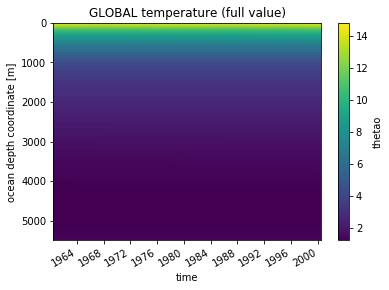

In [9]:
# And now for the absolute temperature values
tgt=tg.transpose()
tgt.plot()

plt.title("GLOBAL temperature (full value)")
plt.ylim((5500,0))

In [ ]:
# We now extract and plot the timeseries for the standardise global anomalies at different levels
tga0=tgs[:,ilev0]
tga500=tgs[:,ilev500]
tga1000=tgs[:,ilev1000]
tga2000=tgs[:,ilev2000]
tga3000=tgs[:,ilev3000]
tga4000=tgs[:,ilev4000]
tga5000=tgs[:,ilev5000]
tga0.plot.line()
tga500.plot.line()
tga1000.plot.line()
tga2000.plot.line()
tga3000.plot.line()
tga4000.plot.line()
tga5000.plot.line()

#t0.plot.line(color="blue",linestyle="dotted")
plt.title("Stand GLOBAL temperature anom (vs initial value)")
plt.legend(["0","500","1000","2000","3000","4000","5000"], loc='best')

/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.e

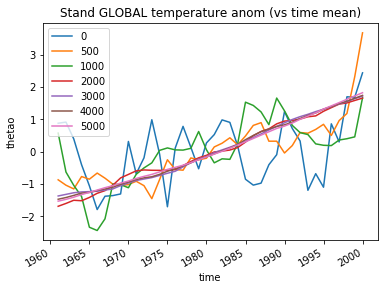

In [62]:
# We now extract and plot the timeseries for the standardise global anomalies at different levels
tga0b=tgs2[:,ilev0]
tga500b=tgs2[:,ilev500]
tga1000b=tgs2[:,ilev1000]
tga2000b=tgs2[:,ilev2000]
tga3000b=tgs2[:,ilev3000]
tga4000b=tgs2[:,ilev4000]
tga5000b=tgs2[:,ilev5000]
tga0b.plot.line()
tga500b.plot.line()
tga1000b.plot.line()
tga2000b.plot.line()
tga3000b.plot.line()
tga4000b.plot.line()
tga5000b.plot.line()

#t0.plot.line(color="blue",linestyle="dotted")
plt.title("Stand GLOBAL temperature anom (vs time mean)")
plt.legend(["0","500","1000","2000","3000","4000","5000"], loc='best')


/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.e

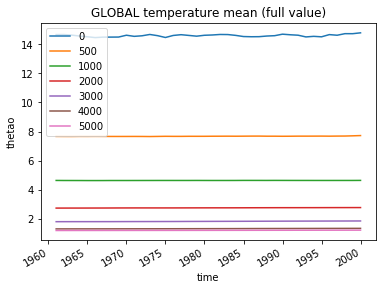

In [63]:
# And we plot the absolute temperature mean values
tg0=tg[:,ilev0]
tg500=tg[:,ilev500]
tg1000=tg[:,ilev1000]
tg2000=tg[:,ilev2000]
tg3000=tg[:,ilev3000]
tg4000=tg[:,ilev4000]
tg5000=tg[:,ilev5000]
tg0.plot.line()
tg500.plot.line()
tg1000.plot.line()
tg2000.plot.line()
tg3000.plot.line()
tg4000.plot.line()
tg5000.plot.line()

#t0.plot.line(color="blue",linestyle="dotted")
plt.title("GLOBAL temperature mean (full value)")
plt.legend(["0","500","1000","2000","3000","4000","5000"], loc='best')